##Installing libraries

If you already have following libraries installed then you don't need to install them again

In [35]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install imblearn

##Importing all the libraries

In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from imblearn.over_sampling import SMOTE

##Loading data and applying pre-processing

In [37]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


**Checking for duplicates**

In [38]:
df.duplicated().sum()

0

**Checking for null values**

In [39]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

**Handling null values in bmi column using mean technique**

In [40]:
# Compute the mean of column 'A'
mean_a = df['bmi'].mean()

# Use the fillna() method to fill missing values in column 'A' with the mean value
df['bmi'].fillna(mean_a, inplace=True)

**Different Visuals of data**

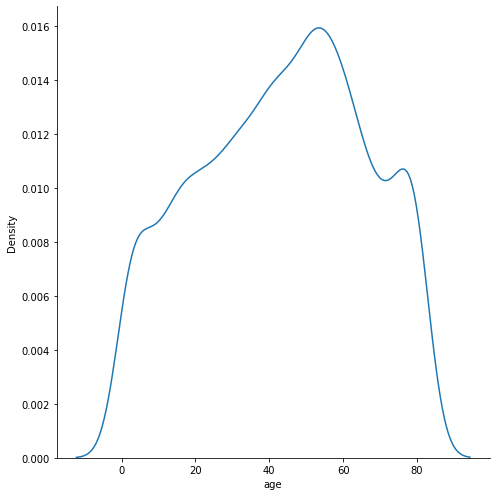

In [41]:
sns.displot(df['age'], kind='kde', height = 7)

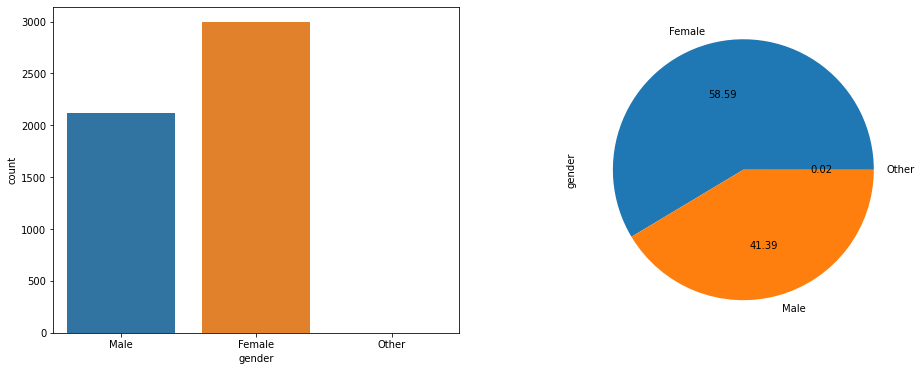

In [42]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x = df['gender'])
plt.subplot(1,2,2)
df['gender'].value_counts().plot(kind='pie',autopct="%.2f")

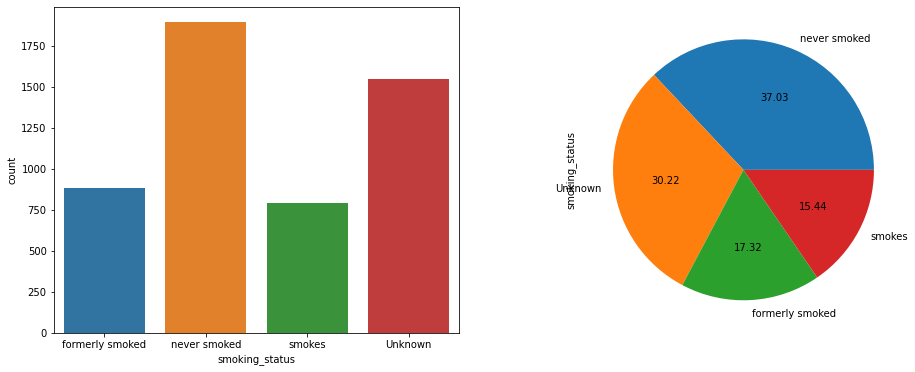

In [43]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.countplot(x = df['smoking_status'])
plt.subplot(1,2,2)
df['smoking_status'].value_counts().plot(kind='pie',autopct="%.2f")

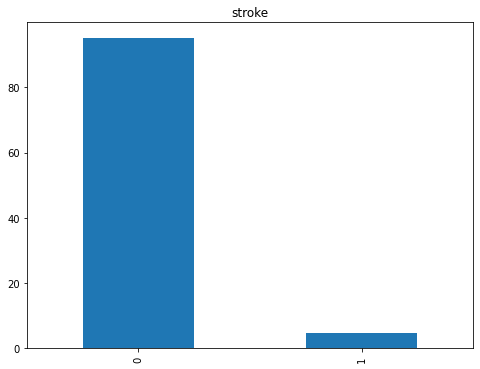

In [44]:
fig , ax = plt.subplots(figsize=(8,6))

df['stroke'].value_counts(normalize=True).mul(100).plot.bar()

plt.title("stroke")
plt.show()

**Performing sampling to handle unbalanced dataset**

In [45]:
def closest_pair_distance(my_list):
     my_list.sort)(

     min_distance = float('inf')
     for i in range(0, len(my_list)):
 	for j in range(i + 1, len(my_list)):

 	min_distance = min(min_distance, abs(my_list[i] - my_list[j]))

     return min_distance 



0    4861
1    4700
Name: stroke, dtype: int64

In [46]:
df = df_oversampled

**Separating X and y features**

In [47]:
df.drop(columns=['id'], axis=1, inplace=True)

X = df.iloc[:,0:10]
y = df.iloc[:,10]


In [48]:
X.shape

(9561, 10)

In [49]:
y.shape

(9561,)

**Splitting data for training and testing**

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Applying One Hot encoder and Standard scaler on required columns**

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'ever_married', 'work_type',	'Residence_type', 'smoking_status' ]


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# create the column transformer for numerical and categorical columns, Remaining coulmns will stay same
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)


# fit and transform the data
preprocessor = preprocessor.fit(X)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

##Decision Trees

**Hyperparameters Tuning**

In [53]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'splitter': ['best','random'], 
              'max_depth': list(range(1, 15, 1)),
              'min_samples_split': list(range(2, 15, 1))}

clf = DecisionTreeClassifier(random_state=42)
grid_DT = GridSearchCV(clf, param_grid, cv=3, verbose = 1)
  
# fitting the model for grid search
grid_DT.fit(X_train, y_train)

print("The best parameters are: ", grid_DT.best_params_)

Fitting 3 folds for each of 364 candidates, totalling 1092 fits
The best parameters are:  {'max_depth': 14, 'min_samples_split': 2, 'splitter': 'best'}


In [54]:
print("The best parameters are: ", grid_DT.best_params_)

The best parameters are:  {'max_depth': 14, 'min_samples_split': 2, 'splitter': 'best'}


**Training the final model**

In [55]:
best_params = grid_DT.best_params_
final_DT = DecisionTreeClassifier(random_state=42).set_params(**best_params)

final_DT = final_DT.fit(X_train,y_train)

##Model Evaluation

**Different Metrics**

In [56]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_auc_score

# Make predictions on the test set
predictions = final_DT.predict(X_test)

# Compute evaluation metrics
acc = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Print the evaluation metrics
print('Accuracy: {:.3f}' .format(acc))
print('Precision: {:.3f}' .format(precision))
print('Recall: {:.3f}' .format(recall))
print('F1 Score {:.3f}' .format(f1))
print('ROC AUC: {:.3f}' .format(roc_auc))

Accuracy: 0.960
Precision: 0.924
Recall: 1.000
F1 Score 0.961
ROC AUC: 0.961


**Classification Report**

In [57]:
from sklearn.metrics import classification_report as rep
report = rep(predictions,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1360
           1       1.00      0.92      0.96      1509

    accuracy                           0.96      2869
   macro avg       0.96      0.96      0.96      2869
weighted avg       0.96      0.96      0.96      2869



**Confusion Matrix**

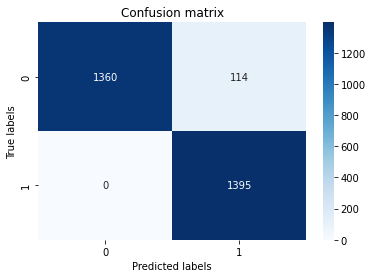

In [58]:
# Compute the confusion matrix
confusion_mat = confusion_matrix(y_test, predictions)

# Create a heatmap visualization of the matrix
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt='d')

# Add labels to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')

# Show the plot
plt.show()


##Results

I utilised a dataset for heart stroke prediction. Since the dataset was unbalanced, it was difficult to train our model quickly. So that I could have equal examples of both classes, I used up-sampling for my minority class. Upsampling confirmed that I had 50% of both classes.

After that, I applied a standard scaler to the numerical features to bring them all to the same scale, and I used a one-hot encoder for the categorical features. I decided to use decision tree classifier for this purpose. I trained my final model using the best hyperparameters I found using grid search, and it provided accuracy of 96% and roc of 96%.